# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 3
shufflePixels = False # will generate noise here 
shuffleLabels = False

In [5]:
# Load data
_, y_train, _, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

x_train = np.random.uniform(low=0, high=225, size=((5000*totalClass), 32, 32, 3))
x_test = np.random.uniform(low=0, high=225, size=((1000*totalClass), 32, 32, 3))
x_train = np.int8(x_train)
x_test = np.int8(x_test)

"""
Generate randome labels (equal likely)
"""

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(15000, 32, 32, 3)
(15000, 3)
(3000, 32, 32, 3)
(3000, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Populating the interactive namespace from numpy and matplotlib


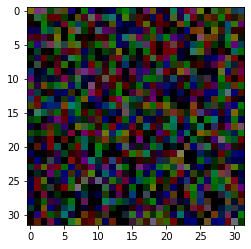

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

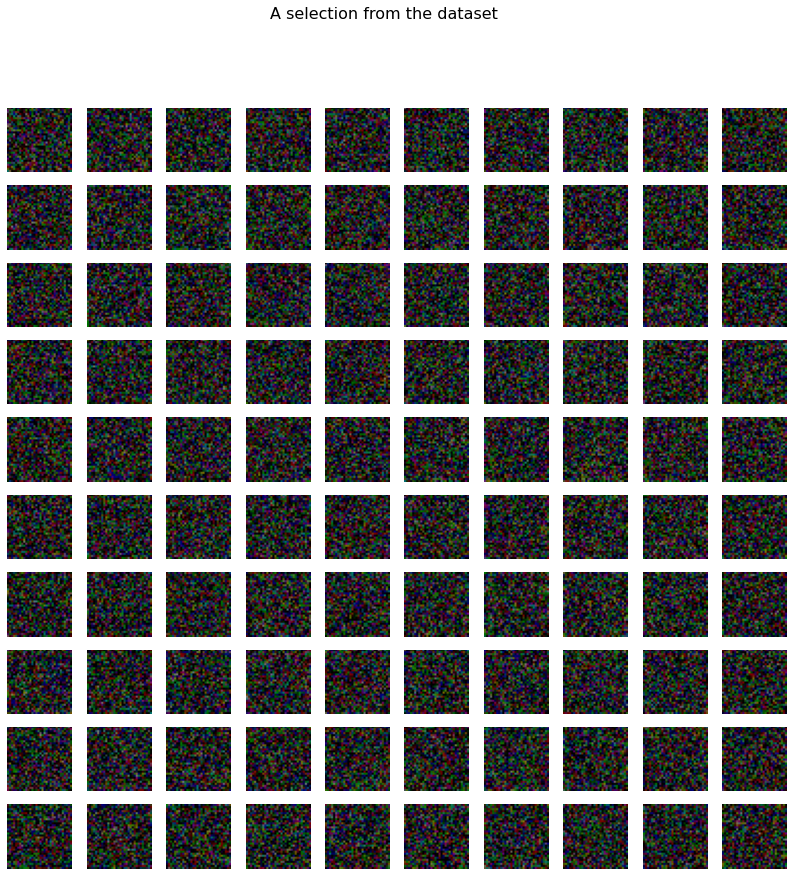

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 10s 43ms/step - loss: 1.1033 - accuracy: 0.3333
test loss, test acc: [1.103344440460205, 0.3333333432674408]
Evaluate on test data
6/6 [==============================] - 1s 246ms/step - loss: 1.1031 - accuracy: 0.3333
test loss, test acc: [1.1030888557434082, 0.3333333432674408]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 7s 32ms/step - loss: 1.0996 - accuracy: 0.3296 - val_loss: 1.0988 - val_accuracy: 0.3220
Epoch 2/250
150/150 [==============================] - 5s 30ms/step - loss: 1.0990 - accuracy: 0.3321 - val_loss: 1.0990 - val_accuracy: 0.3237
Epoch 3/250
150/150 [==============================] - 5s 30ms/step - loss: 1.0984 - accuracy: 0.3389 - val_loss: 1.0988 - val_accuracy: 0.3293
Epoch 4/250
150/150 [==============================] - 5s 30ms/step - loss: 1.0981 - accuracy: 0.3463 - val_loss: 1.0991 - val_accuracy: 0.3350
Epoch 5/250
150/150 [==============================] - 5s 30ms/step - loss: 1.0980 - accuracy: 0.3471 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 6/250
150/150 [==============================] - 5s 30ms/step - loss: 1.0976 - accuracy: 0.3525 - val_loss: 1.0990 - val_accuracy: 0.3337
Epoch 7/250
150/150 [==============================] - 5s 30ms/step - loss: 1.0969 - accuracy: 0.3569 - val_loss: 1.1002 - val_accuracy:

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 29ms/step - loss: 6.2553e-07 - accuracy: 1.0000
test loss, test acc: [6.255277753552946e-07, 1.0]
Evaluate on test data
6/6 [==============================] - 0s 29ms/step - loss: 8.3630 - accuracy: 0.3363
test loss, test acc: [8.363018035888672, 0.33633333444595337]


# Small

In [12]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 8ms/step - loss: 8.6770 - accuracy: 0.3327
test loss, test acc: [8.676979064941406, 0.3327333331108093]
Evaluate on test data
6/6 [==============================] - 0s 28ms/step - loss: 8.6727 - accuracy: 0.3263
test loss, test acc: [8.672736167907715, 0.32633334398269653]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 2s 8ms/step - loss: 5.0407 - accuracy: 0.3303 - val_loss: 1.0993 - val_accuracy: 0.3433
Epoch 2/250
150/150 [==============================] - 1s 7ms/step - loss: 1.1459 - accuracy: 0.3343 - val_loss: 1.0987 - val_accuracy: 0.3380
Epoch 3/250
150/150 [==============================] - 1s 7ms/step - loss: 1.1140 - accuracy: 0.3356 - val_loss: 1.0986 - val_accuracy: 0.3363
Epoch 4/250
150/150 [==============================] - 1s 7ms/step - loss: 1.1059 - accuracy: 0.3385 - val_loss: 1.0986 - val_accuracy: 0.3460
Epoch 5/250
150/150 [==============================] - 1s 8ms/step - loss: 1.1074 - accuracy: 0.3338 - val_loss: 1.0988 - val_accuracy: 0.3227
Epoch 6/250
150/150 [==============================] - 1s 7ms/step - loss: 1.1041 - accuracy: 0.3321 - val_loss: 1.0987 - val_accuracy: 0.3243
Epoch 7/250
150/150 [==============================] - 1s 7ms/step - loss: 1.1038 - accuracy: 0.3321 - val_loss: 1.0986 - val_accuracy: 0.3333

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 0s 6ms/step - loss: 0.2312 - accuracy: 0.9941
test loss, test acc: [0.2311938852071762, 0.9941333532333374]
Evaluate on test data
6/6 [==============================] - 0s 6ms/step - loss: 1.4006 - accuracy: 0.3337
test loss, test acc: [1.4006396532058716, 0.3336666524410248]


#tNet

In [16]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 3s 46ms/step - loss: 2.3843 - accuracy: 0.3335
test loss, test acc: [2.3843140602111816, 0.3335333466529846]
Evaluate on test data
6/6 [==============================] - 1s 159ms/step - loss: 2.3808 - accuracy: 0.3333
test loss, test acc: [2.3808248043060303, 0.3333333432674408]


In [18]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 8s 41ms/step - loss: 1.3735 - accuracy: 0.3300 - val_loss: 1.1289 - val_accuracy: 0.3303
Epoch 2/250
150/150 [==============================] - 6s 39ms/step - loss: 1.0721 - accuracy: 0.4497 - val_loss: 1.1438 - val_accuracy: 0.3337
Epoch 3/250
150/150 [==============================] - 6s 39ms/step - loss: 0.8466 - accuracy: 0.6307 - val_loss: 1.1886 - val_accuracy: 0.3420
Epoch 4/250
150/150 [==============================] - 6s 41ms/step - loss: 0.6409 - accuracy: 0.7597 - val_loss: 1.2953 - val_accuracy: 0.3517
Epoch 5/250
150/150 [==============================] - 6s 39ms/step - loss: 0.4464 - accuracy: 0.8507 - val_loss: 1.4271 - val_accuracy: 0.3493
Epoch 6/250
150/150 [==============================] - 6s 41ms/step - loss: 0.2919 - accuracy: 0.9152 - val_loss: 1.5949 - val_accuracy: 0.3457
Epoch 7/250
150/150 [==============================] - 6s 41ms/step - loss: 0.1906 - accuracy: 0.9528 - val_loss: 1.7565 - val_accuracy:

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 39ms/step - loss: 0.0043 - accuracy: 0.9993
test loss, test acc: [0.004284901078790426, 0.9992666840553284]
Evaluate on test data
6/6 [==============================] - 0s 39ms/step - loss: 4.4908 - accuracy: 0.3110
test loss, test acc: [4.4908447265625, 0.3109999895095825]


# ConvNet

In [20]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 4s 67ms/step - loss: 1.1504 - accuracy: 0.3311
test loss, test acc: [1.1503900289535522, 0.33106666803359985]
Evaluate on test data
6/6 [==============================] - 2s 400ms/step - loss: 1.1469 - accuracy: 0.3317
test loss, test acc: [1.1468589305877686, 0.3316666781902313]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 8s 43ms/step - loss: 1.1582 - accuracy: 0.3412 - val_loss: 1.1023 - val_accuracy: 0.3437
Epoch 2/250
150/150 [==============================] - 6s 39ms/step - loss: 1.0991 - accuracy: 0.3314 - val_loss: 1.0987 - val_accuracy: 0.3303
Epoch 3/250
150/150 [==============================] - 6s 41ms/step - loss: 1.0985 - accuracy: 0.3315 - val_loss: 1.0986 - val_accuracy: 0.3327
Epoch 4/250
150/150 [==============================] - 6s 41ms/step - loss: 1.0987 - accuracy: 0.3310 - val_loss: 1.0986 - val_accuracy: 0.3323
Epoch 5/250
150/150 [==============================] - 6s 41ms/step - loss: 1.0987 - accuracy: 0.3258 - val_loss: 1.0986 - val_accuracy: 0.3337
Epoch 6/250
150/150 [==============================] - 6s 41ms/step - loss: 1.0987 - accuracy: 0.3309 - val_loss: 1.0986 - val_accuracy: 0.3337
Epoch 7/250
150/150 [==============================] - 6s 39ms/step - loss: 1.0987 - accuracy: 0.3247 - val_loss: 1.0986 - val_accuracy:

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 45ms/step - loss: 1.0986 - accuracy: 0.3333
test loss, test acc: [1.0986127853393555, 0.3333333432674408]
Evaluate on test data
6/6 [==============================] - 0s 46ms/step - loss: 1.0986 - accuracy: 0.3333
test loss, test acc: [1.098612904548645, 0.3333333432674408]


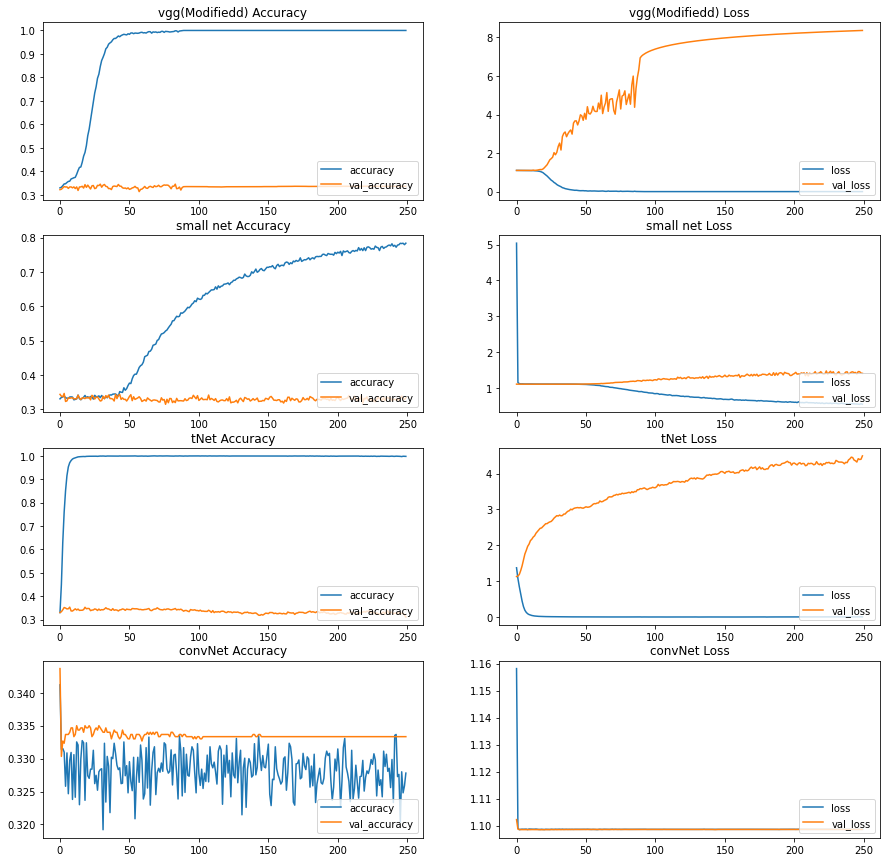

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
